![bse_logo_textminingcourse](https://bse.eu/sites/default/files/styles/bgse_image_highlighted_image/public/carrousel/BSE_Summer_School.jpg?itok=rz2Sx5Ok)

# Harnessing Language Models: Your Path to NLP Expert - Day 1

# Introduction to Natural Language Processing (NLP)

This notebook gives you a brief introduction in text pre-processing pipelines in NLP. We start with reading in a labelled text corpus from Ag-news and exploring its variables. We then go through a canonical pre-processing pipeline used for the so-called "bags of words" model which represents documents in a document-term-matrix. Finally, we will discuss one of the many tokenizers used for deep learning methods.

## Table of Contents

1. **[Part 1: Read in Text and Explore](#part1)**

2. **[Part 2: Pre-processing for Bag of Words Model](#part2)**

3. **[Part 3: The Document Term Matrix](#part3)**

4. **[Part 4: Tf-idf](#part4)**

5. **[Part 5: Appied Research - Implementation of Generation of Dictionary from Labelled Documents](#part5)**

6. **[Homework](#hw)**



#Pre-amble

The following shows the structure of what we will do again and again now.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
texts=["I like apples", "I like oranges","I like apples and I like oranges"]

In [12]:
vectorizer=TfidfVectorizer()
tfidf_mat=vectorizer.fit_transform(texts)

In [13]:
tfidf_mat.toarray()

array([[0.        , 0.78980693, 0.61335554, 0.        ],
       [0.        , 0.        , 0.61335554, 0.78980693],
       [0.53058735, 0.40352536, 0.62674687, 0.40352536]])

In [14]:
vectorizer.get_feature_names_out()

array(['and', 'apples', 'like', 'oranges'], dtype=object)

#Installation

Now let's move on and install the packages needed for the session.

In [15]:
!pip install pandas
!pip install nltk
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 31.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:


import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer

import spacy

import pandas as pd

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer

import re


from tqdm import tqdm
tqdm.pandas()


#getting a library of stopwords and defining a lemmatizer
porter=SnowballStemmer("english")
lmtzr = WordNetLemmatizer()



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<a name="part1"></a>
## Part 1: Read in Text and Explore

We will load the AG News corpus and perform necessary preprocessing steps like exploring the dataset.

In [1]:
!pip install datasets

In [5]:
from datasets import load_dataset

# Load the 'ag_news' dataset
dataset = load_dataset("ag_news")

# Explore the structure of the dataset
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})


Let's create stratified samples for training and validation sets ensuring that each class is represented in proportion to its frequency. It will go faster with just a sample, and we will be able to make tests on validation test before trying to work on the testing set.

In [6]:
corpus_data = pd.DataFrame(dataset['train']['text'][:30000])
corpus_data.columns =['text']
corpus_data['labels'] = dataset['train']['label'][:30000]
corpus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    30000 non-null  object
 1   labels  30000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 468.9+ KB


In [11]:
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')

# Save the DataFrame to Google Drive
file_path = '/content/drive/My Drive/corpus_data.csv'
corpus_data.to_csv(file_path, index=False)

print(f"DataFrame saved to {file_path}")

Mounted at /content/drive
DataFrame saved to /content/drive/My Drive/corpus_data.csv


In [ ]:
corpus_data.text[0]

"Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again."

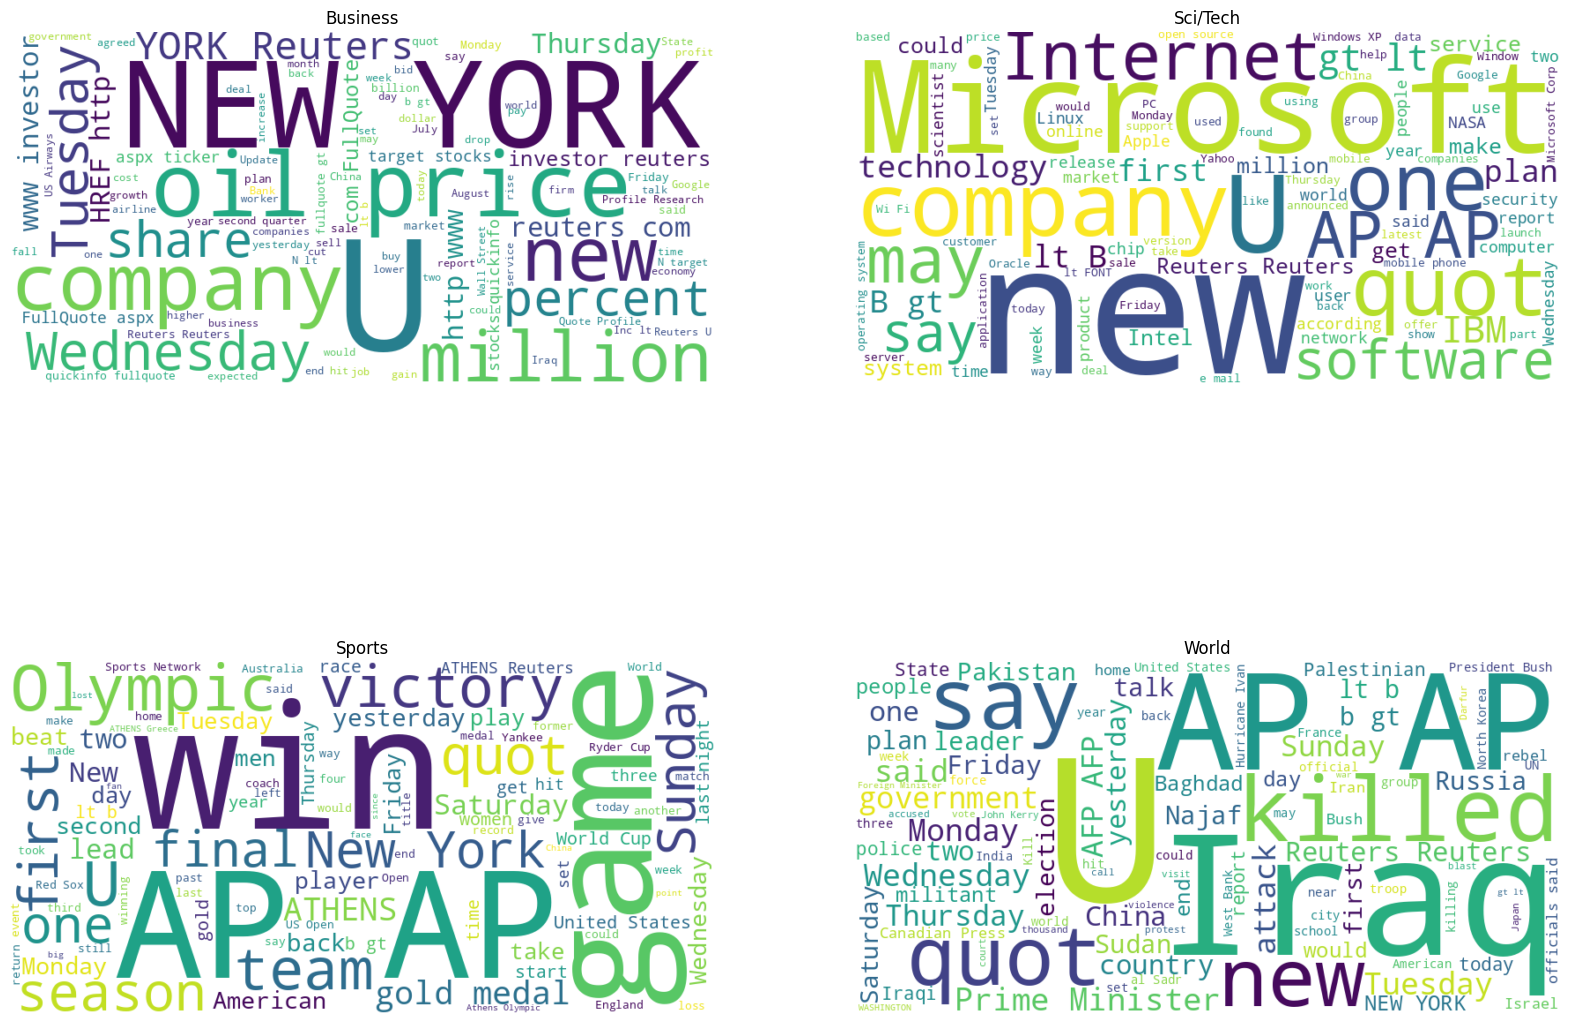

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

labels = {0: 'World', 1: 'Sports',
          2: 'Business', 3: 'Sci/Tech'}

# Prepare data for wordclouds
# Aggregate texts by their labels
text_by_label = defaultdict(str)
for text, label in zip(corpus_data['text'], corpus_data['labels']):
    text_by_label[label] += " " + text

# Generate and plot wordclouds for each label
plt.figure(figsize=(20, 15))
for idx, (label, text) in enumerate(text_by_label.items(), 1):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100, width=800, height=400).generate(text)

    plt.subplot(2, 2, idx)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(labels[label])
    plt.axis('off')

plt.show()


Word clouds show the most common terms in large letters. What do you not like about these word clouds?

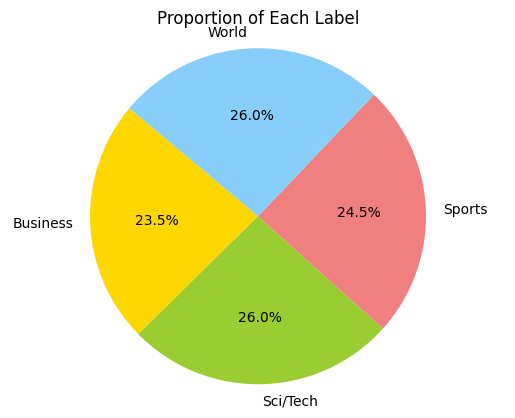

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the frequency of each label
label_counts = Counter(corpus_data['labels'])

# Data to plot
_labels = [labels.get(lab) for lab in label_counts.keys()]
sizes = label_counts.values()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Plotting the pie chart
plt.pie(sizes, labels=_labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Each Label')
plt.show()


<a name="part2"></a>
## Part 2: Pre-processing

Pre-processing for is a very important part of text analysis when using the the bag-of-words model. The code below contains a pipeline that offers three options:

- modulation=0: convert to lower case

- modulation=1: stemming

- modulation=2: lemmatizing

The pipeline always does: tokenization, remove punctuation, remove stopwords

It then make counts to construct the document-term matrix (vectorization)

Towards the end I show you the way using sklearn package which will also facilitate the inclusion of N-grams in the document term matrix.

**Companion notebook for pre-processing introduction**
The companion notebook gives you a much more detailed discussion of all the steps in pre-processing. These are (in the best order):
- **Tokenization**

- **Normalization**
  - Lemmatizing
  - Removing punctuation
  - Unifying text (e.g., converting to lower case)
  - Removing stopwords
  - Stemming

- **Counting (N-grams) -> Document-Term Matrix (Vectorization)**

This is not the order you typically see on webpages talking about pre-processing but I think it is the actual order in which you approach things chronologically. Lemmatizing is the really odd one in the order. It is also the most complex and the least well-packaged. So worth spending a little time on.

### Define our functions to clean the data

In [ ]:
#this requires spacy to be installed
sp = spacy.load('en_core_web_sm')

#additional functions

def strip(word):
    mod_string = re.sub(r'\W+', '', word)
    return mod_string

#the following leaves in place two or more capital letters in a row
#will be ignored when using standard stemming
def abbr_or_lower(word):
    if re.match('([A-Z]+[a-z]*){2,}', word):
        return word
    else:
        return word.lower()

#modular pipeline for stemming, lemmatizing and lowercasing
#note this is NOT lemmatizing using grammar pos

def tokenize(text, modulation):
    if modulation<2:
        tokens = re.split(r'\W+', text)
        stems = []
        # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
        for token in tokens:
            lowers=abbr_or_lower(token)
            if lowers not in stop_words:
                if re.search('[a-zA-Z]', lowers):
                    if modulation==0:
                        stems.append(lowers)
                    if modulation==1:
                        stems.append(porter.stem(lowers))
    else:
        sp_text=sp(text)
        stems = []
        lemmatized_text=[]
        for word in sp_text:
            lemmatized_text.append(word.lemma_)
        stems = [abbr_or_lower(strip(w)) for w in lemmatized_text if (abbr_or_lower(strip(w))) and (abbr_or_lower(strip(w)) not in stop_words)]
    return " ".join(stems)


def vectorize(tokens, vocab):
    vector=[]
    for w in vocab:
        vector.append(tokens.count(w))
    return vector

### Apply cleaning functions

In [ ]:
tqdm.pandas(desc="my progress bar")

#=0 means just lowercase, #=1 means stemming, =2 means lemmatizing
###########################################################
###########################################################
mod=1
###########################################################
###########################################################


#pre-process text
text_preproc = (
    corpus_data.text
    .astype(str)
    .progress_apply(lambda row: tokenize(row, mod))
)

corpus_data["text_preproc"]=text_preproc

print("done with text")




my progress bar: 100%|██████████| 30000/30000 [00:18<00:00, 1594.41it/s]


done with text


In [ ]:
#raw text
print(corpus_data.text[0])

Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.


In [ ]:
#preprocessed text
print(corpus_data.text_preproc[0])

wall st bear claw back black reuter reuter short seller wall street dwindl band ultra cynic see green


<a name="part3"></a>
# Part 3: Document Term Matix


In [ ]:
%%time
cv = CountVectorizer(ngram_range = (1,1), lowercase=False)
cv.fit(corpus_data.text_preproc)



vectorized_text=cv.transform(corpus_data.text_preproc)
vectorized_text=vectorized_text.todense()
print("document term matrix has size", vectorized_text.shape)


document term matrix has size (30000, 24229)
CPU times: user 1.87 s, sys: 1.54 s, total: 3.42 s
Wall time: 3.44 s


In [ ]:
len(cv.get_feature_names_out())

24229

## Experiment with the CountVectorizer

Use the following options:

- ngram_range=(1, 1), (1,2), (2,2), (3,3)

- max_df=1.0, 0.5, 0.2

- min_df=1, 5, 0.1

How does it affect the vocabulary you get out?

In [ ]:
cv = CountVectorizer(ngram_range = (1,3),  min_df=0.001, max_df=0.15)
cv.fit(corpus_data.text_preproc)
vectorized_text=cv.transform(corpus_data.text_preproc)
vectorized_text=vectorized_text.todense()
print("document term matrix has size", vectorized_text.shape)
print(cv.get_feature_names_out())

document term matrix has size (30000, 4474)
['10th' '11th' '12th' ... 'ziff davi ziff' 'zimbabw' 'zone']


In [ ]:
# Assuming 'cv' is your CountVectorizer instance and 'vectorized_text' is the result of transformation
# And 'assigned_labels' are the labels for each document in your dataset
import numpy as np

# Get feature names to use as words for the word clouds
feature_names = cv.get_feature_names_out()

# Aggregate counts by label
label_counts = {}
for label in np.unique(corpus_data['labels']):
    # Select rows of 'vectorized_text' that correspond to the current label
    label_indices = np.where(corpus_data['labels']== label)[0]
    label_matrix = vectorized_text[label_indices]

    # Sum counts for the current label
    aggregated_counts = np.sum(label_matrix, axis=0)

    # Convert the aggregated counts to a dictionary {word: count}
    # Note: 'aggregated_counts' is a matrix; use '.A1' to convert it to an array for easier handling
    word_counts = {feature_names[i]: aggregated_counts[0, i] for i in range(len(feature_names))}
    label_counts[label] = word_counts


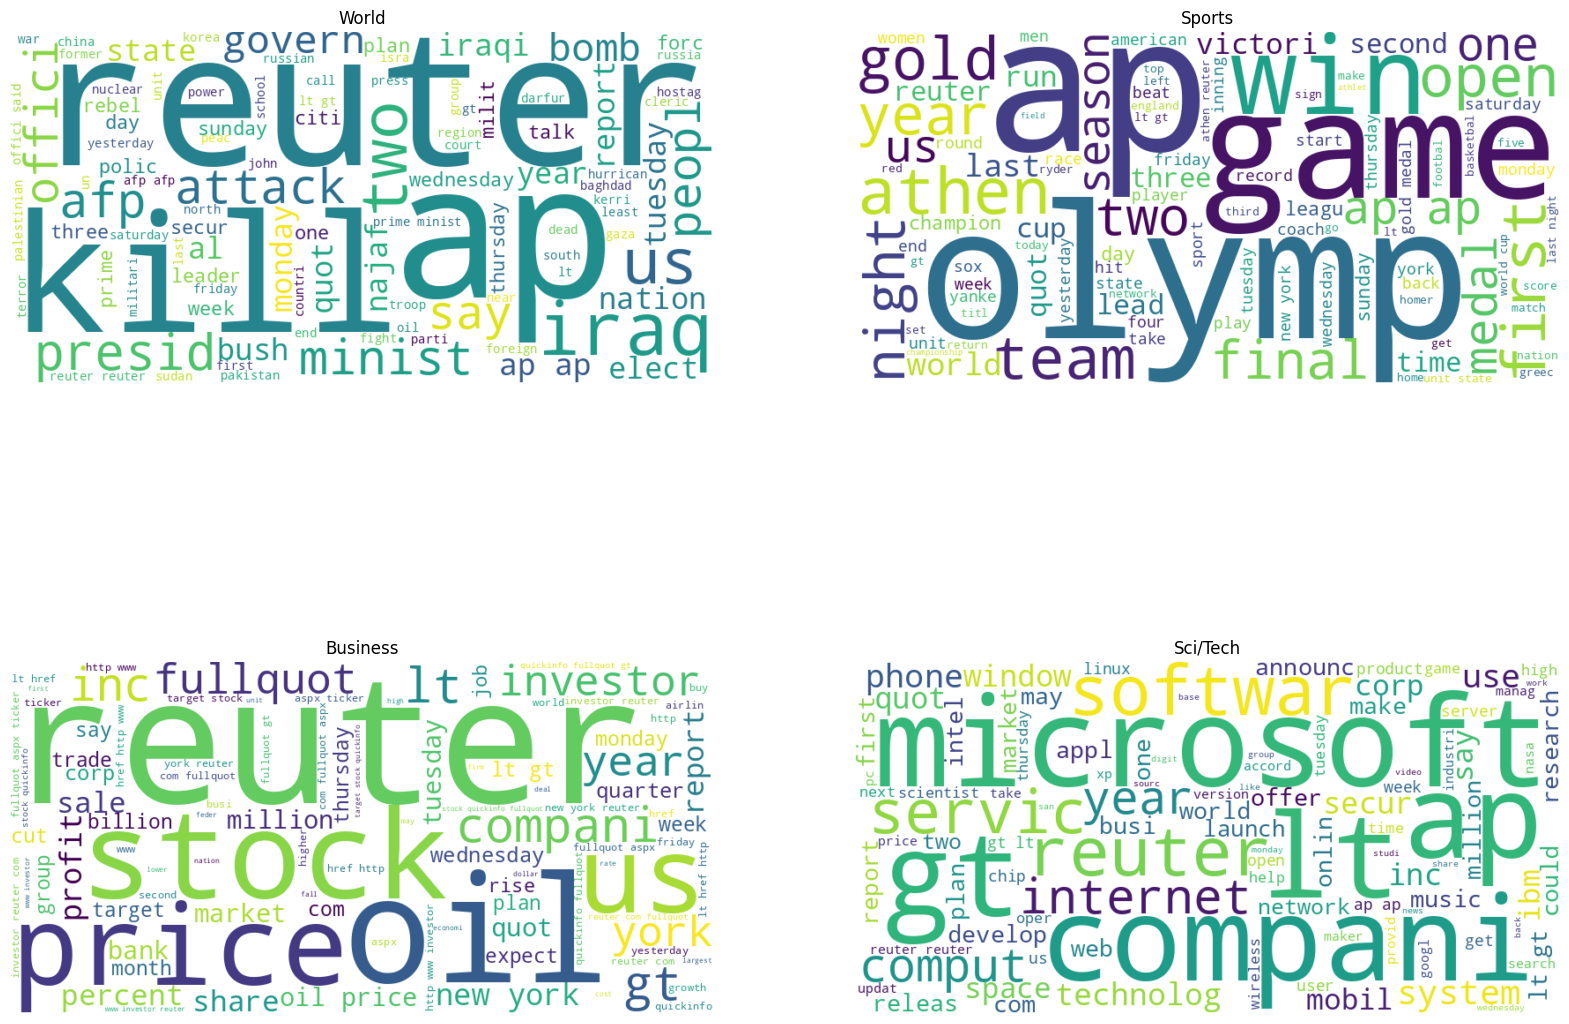

In [ ]:


plt.figure(figsize=(20, 15))

# Loop through each label and its aggregated word counts
for idx, (label, word_counts) in enumerate(label_counts.items(), 1):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100, width=800, height=400).generate_from_frequencies(word_counts)

    plt.subplot(2, 2, idx)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(labels[label])
    plt.axis('off')

plt.show()

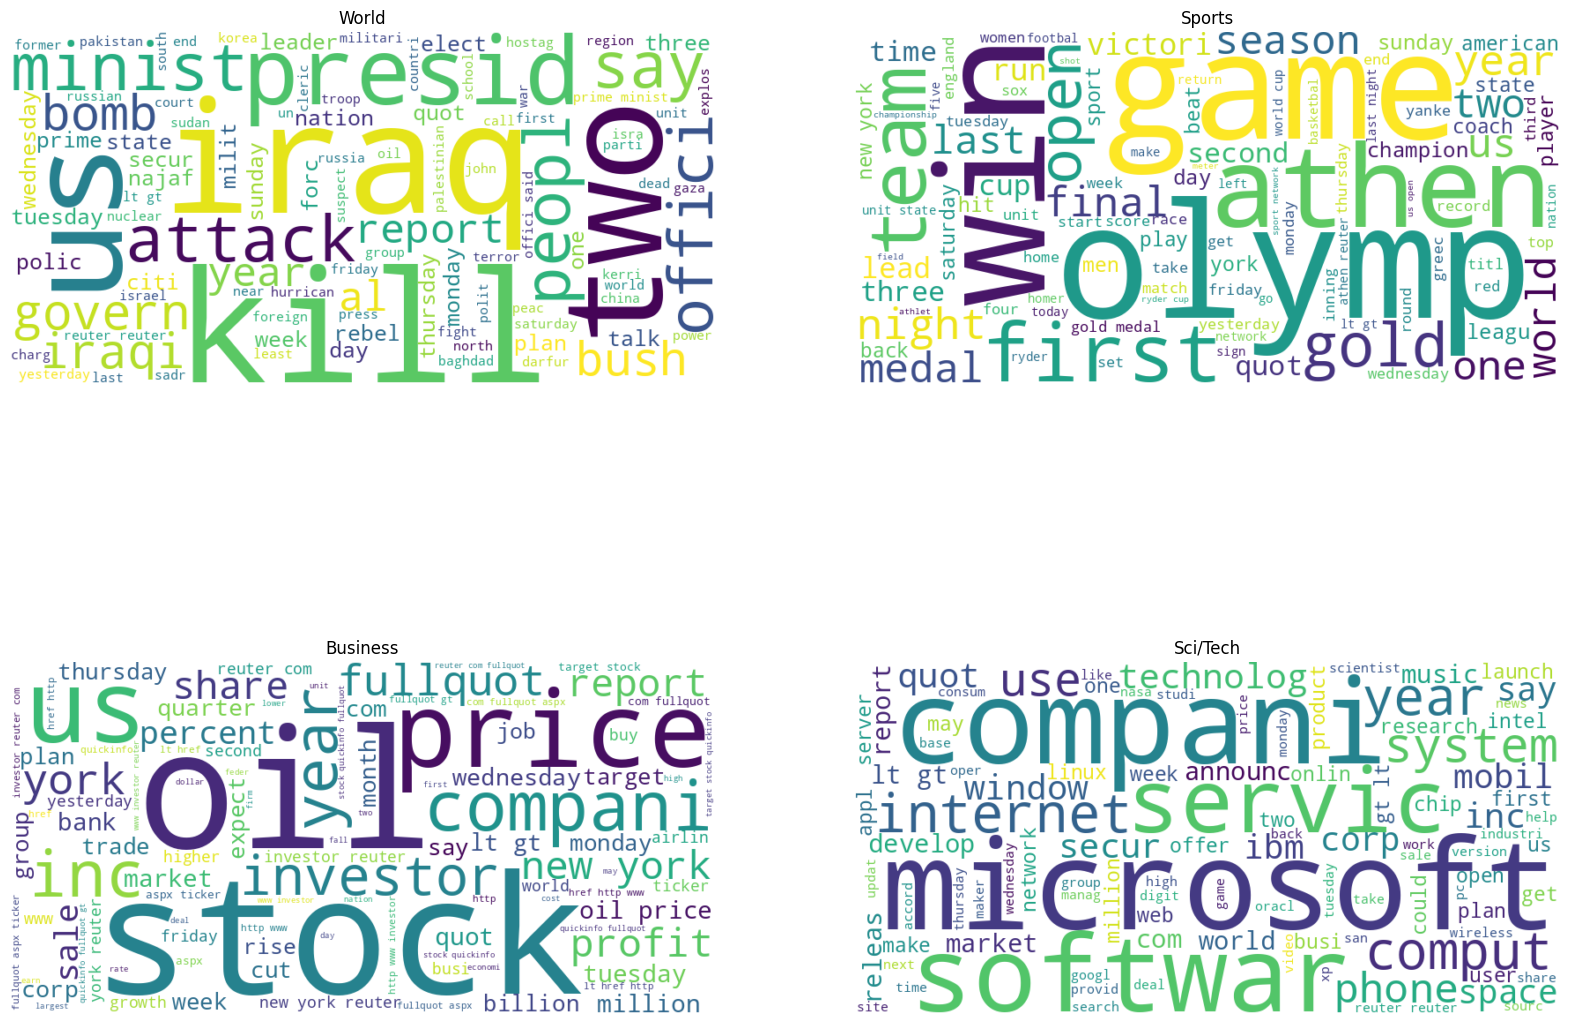

In [ ]:
plt.figure(figsize=(20, 15))

# Loop through each label and its aggregated word counts
for idx, (label, word_counts) in enumerate(label_counts.items(), 1):

    # NEW LINE: Remove 'ap' from the word counts if it exists
    word_counts_filtered = {word: count for word, count in word_counts.items() if word not in ['reuter','ap','lt','gt', 'ap ap','afp','afp afp']}

    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100, width=800, height=400).generate_from_frequencies(word_counts_filtered)

    plt.subplot(2, 2, idx)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(labels[label])
    plt.axis('off')

plt.show()



<a name="part4"></a>
## Part 4: Adding tf-idf weighting

Now we will use the same min_df and max_df settings but then do a Tfidf weighting after we vectorize. The result is are word clouds that slightly downweigh very common terms. You see this in ap becoming smaller when compared to the word cloud generated by the same count vectorizer setting without tf-idf weighting.

In [ ]:
cv = TfidfVectorizer(ngram_range = (1,3),  min_df=0.001, max_df=0.15)
cv.fit(corpus_data.text_preproc)
vectorized_text=cv.transform(corpus_data.text_preproc)
vectorized_text=vectorized_text.todense()
print("document term matrix has size", vectorized_text.shape)
print(cv.get_feature_names_out())

document term matrix has size (30000, 4474)
['10th' '11th' '12th' ... 'ziff davi ziff' 'zimbabw' 'zone']


In [ ]:
# Get feature names to use as words for the word clouds
feature_names = cv.get_feature_names_out()

# Aggregate counts by label
label_counts = {}
for label in np.unique(corpus_data['labels']):
    # Select rows of 'vectorized_text' that correspond to the current label
    label_indices = np.where(corpus_data['labels']== label)[0]
    label_matrix = vectorized_text[label_indices]

    # Sum counts for the current label
    aggregated_counts = np.sum(label_matrix, axis=0)

    # Convert the aggregated counts to a dictionary {word: count}
    # Note: 'aggregated_counts' is a matrix; use '.A1' to convert it to an array for easier handling
    word_counts = {feature_names[i]: aggregated_counts[0, i] for i in range(len(feature_names))}
    label_counts[label] = word_counts

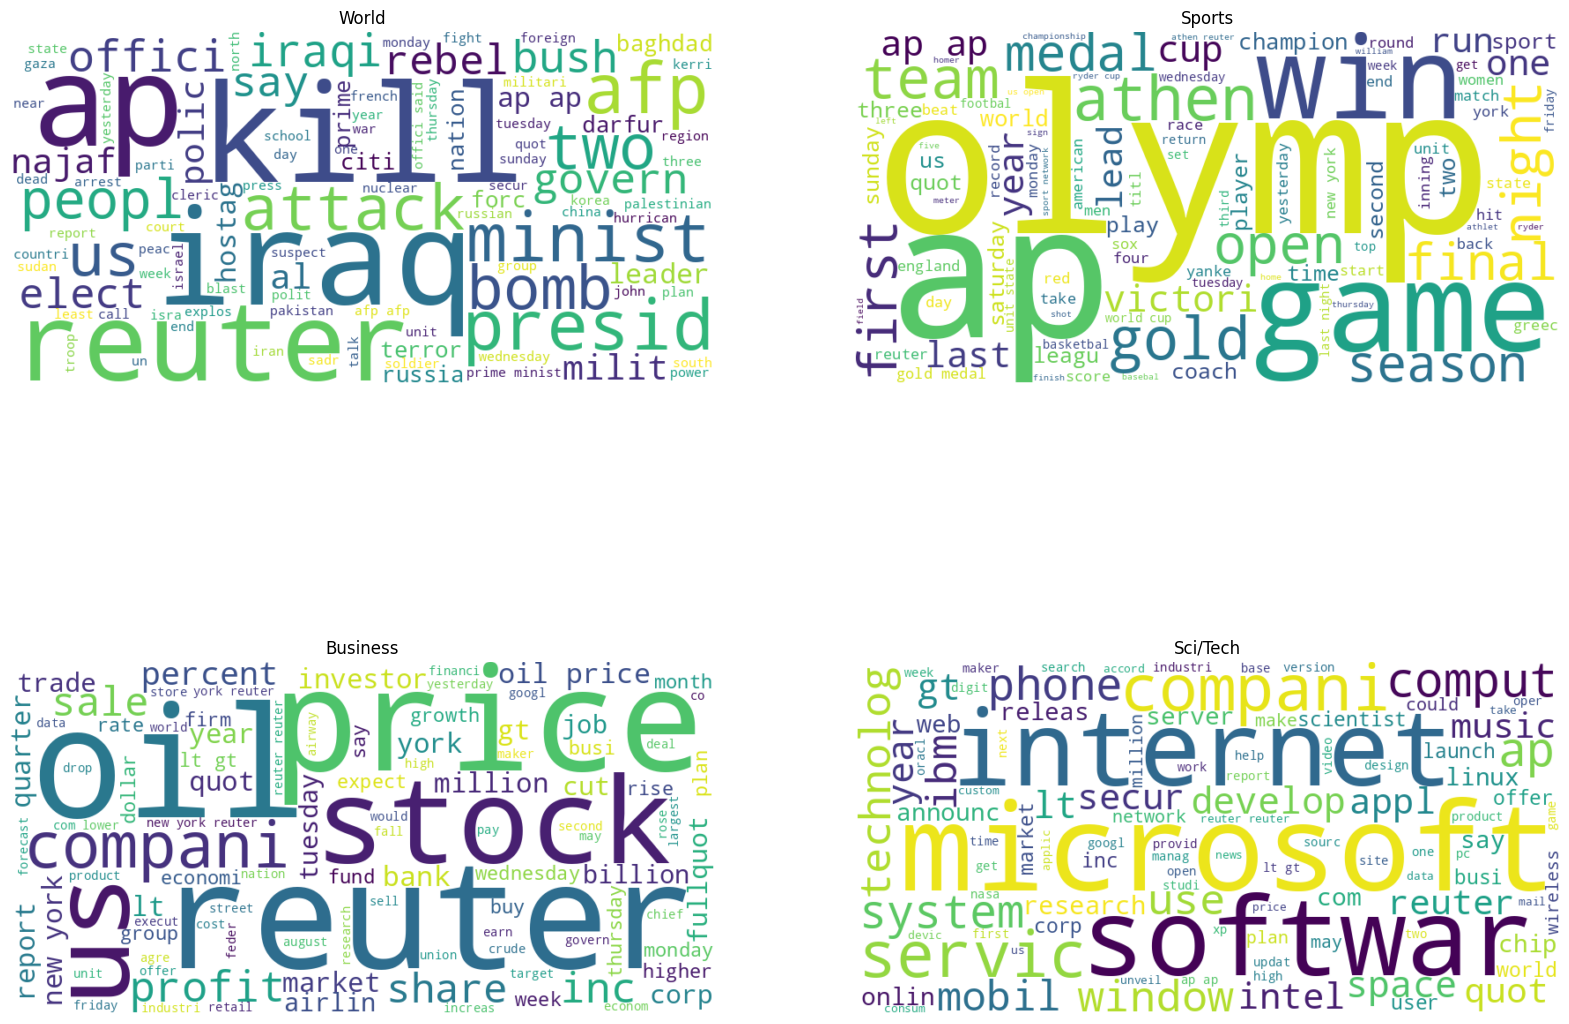

In [ ]:
plt.figure(figsize=(20, 15))

# Loop through each label and its aggregated word counts
for idx, (label, word_counts) in enumerate(label_counts.items(), 1):
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100, width=800, height=400).generate_from_frequencies(word_counts)

    plt.subplot(2, 2, idx)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(labels[label])
    plt.axis('off')

plt.show()

<a name="part5"></a>
# Part 5: Appied Research - Implementation of Generation of Dictionary from Labelled Documents

In this part of the notebook we simulate the making of dictionaries as in Hassan et al and Uribe at al (2024). We use the labels first to make four large documents. You would typically do the same generating documents from textbooks from finance and politics for example or like we do in our paper on Spain from discussions of historians or other experts. You then use the tf-idf and see what comes out on top. This method can yield extremely nice dictionaries for identifying issues.

In [ ]:
cv = CountVectorizer(ngram_range = (1,3),  min_df=0.001, max_df=0.15)
cv.fit(corpus_data.text_preproc)
vectorized_text=cv.transform(corpus_data.text_preproc)
vectorized_text=vectorized_text.toarray()
print("document term matrix has size", vectorized_text.shape)
print(cv.get_feature_names_out())



from scipy.sparse import csr_matrix

# Assuming 'vectorized_text' is the document-term matrix from CountVectorizer
# and 'assigned_labels' are the labels for each document

# Create an empty matrix with the same number of columns as 'vectorized_text' and rows for each unique label
num_labels = len(np.unique(corpus_data['labels']))
num_features = vectorized_text.shape[1]
aggregated_by_label = csr_matrix((num_labels, num_features))

# Sum up the vectors for each label
for label in np.unique(corpus_data['labels']):
    label_indices = np.where(corpus_data['labels'] == label)[0]
    aggregated_by_label[label] = vectorized_text[label_indices].sum(axis=0)


document term matrix has size (30000, 4474)
['10th' '11th' '12th' ... 'ziff davi ziff' 'zimbabw' 'zone']


/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [ ]:
aggregated_by_label=aggregated_by_label.toarray()

In [ ]:
# Adjust the TF-IDF transformer to avoid division by zero errors
tfidf_transformer = TfidfTransformer(smooth_idf=True, sublinear_tf=True)

# Try transforming the aggregated document-term matrix again
try:
    tfidf_matrix = tfidf_transformer.fit_transform(aggregated_by_label)
except ValueError as e:
    print(f"Error transforming matrix: {e}")


### Approach 1: List-Based Exclusion


* Ignore List: Utilizes a hardcoded list of terms (`ignore_dictionary`) to exclude from the word clouds.
* Direct Filtering: Iterates through the word frequencies and explicitly checks if each word is not in the ignore_dictionary before including it in the word cloud.

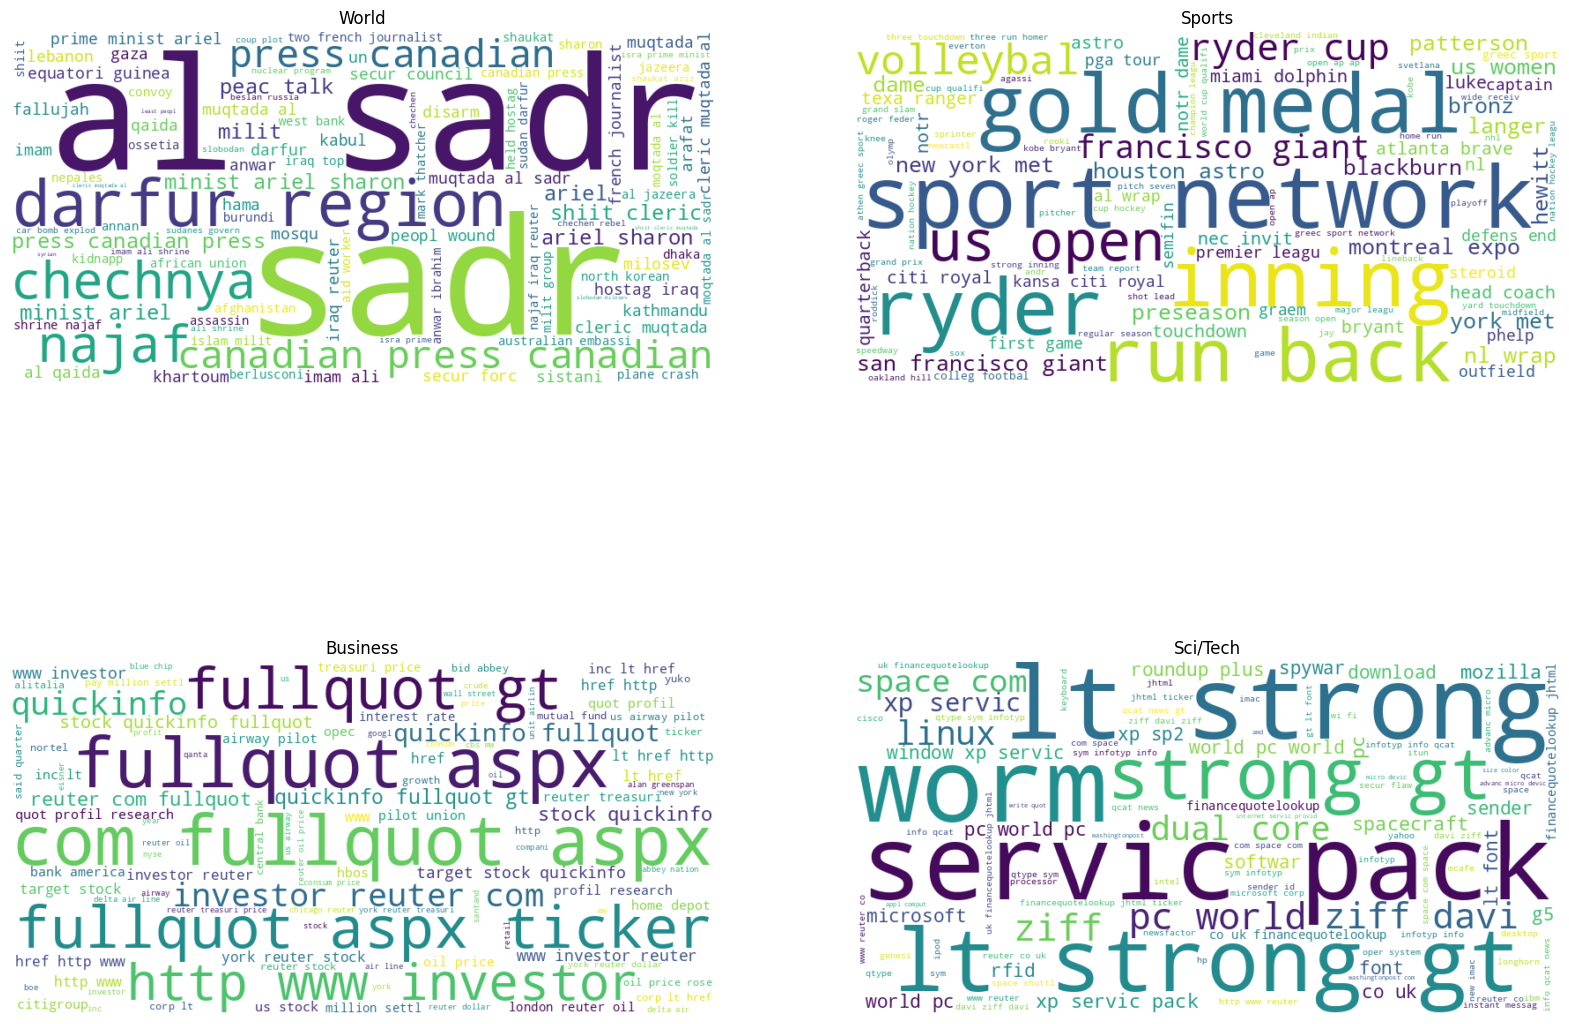

In [ ]:
plt.figure(figsize=(20, 15))

# Assuming 'cv' is the original CountVectorizer instance to get feature names
feature_names = cv.get_feature_names_out()

ignore_dictionary=['fullquot','com fullquot','aspx','aspx ticker','com','reuter com', 'reuter','ap','lt','gt', 'ap ap','afp','afp afp']

for label in range(num_labels):
    # Convert the TF-IDF row for the label into a word-frequency dictionary
    row = np.squeeze(tfidf_matrix[label].toarray())
    word_freqs = {feature_names[i]: row[i] for i in range(len(feature_names)) if row[i] > 0}

    word_freqs_filtered = {word: count for word, count in word_freqs.items() if word not in ignore_dictionary}
    # Generate the word cloud
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100, width=800, height=400).generate_from_frequencies(word_freqs_filtered)

    plt.subplot(2, 2, label+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(labels[label])
    plt.axis('off')

plt.show()


### Approach 2: Regex-Based Exclusion


* Regex Pattern: Uses a compiled regular expression pattern to match and exclude words based on a pattern (pattern).
* Pattern Matching: Filters out words by checking if they match the regex pattern, which can identify terms based on partial or full patterns within the words.
* Dynamic Matching: More flexible in matching a range of related or similar terms without specifying each one explicitly.

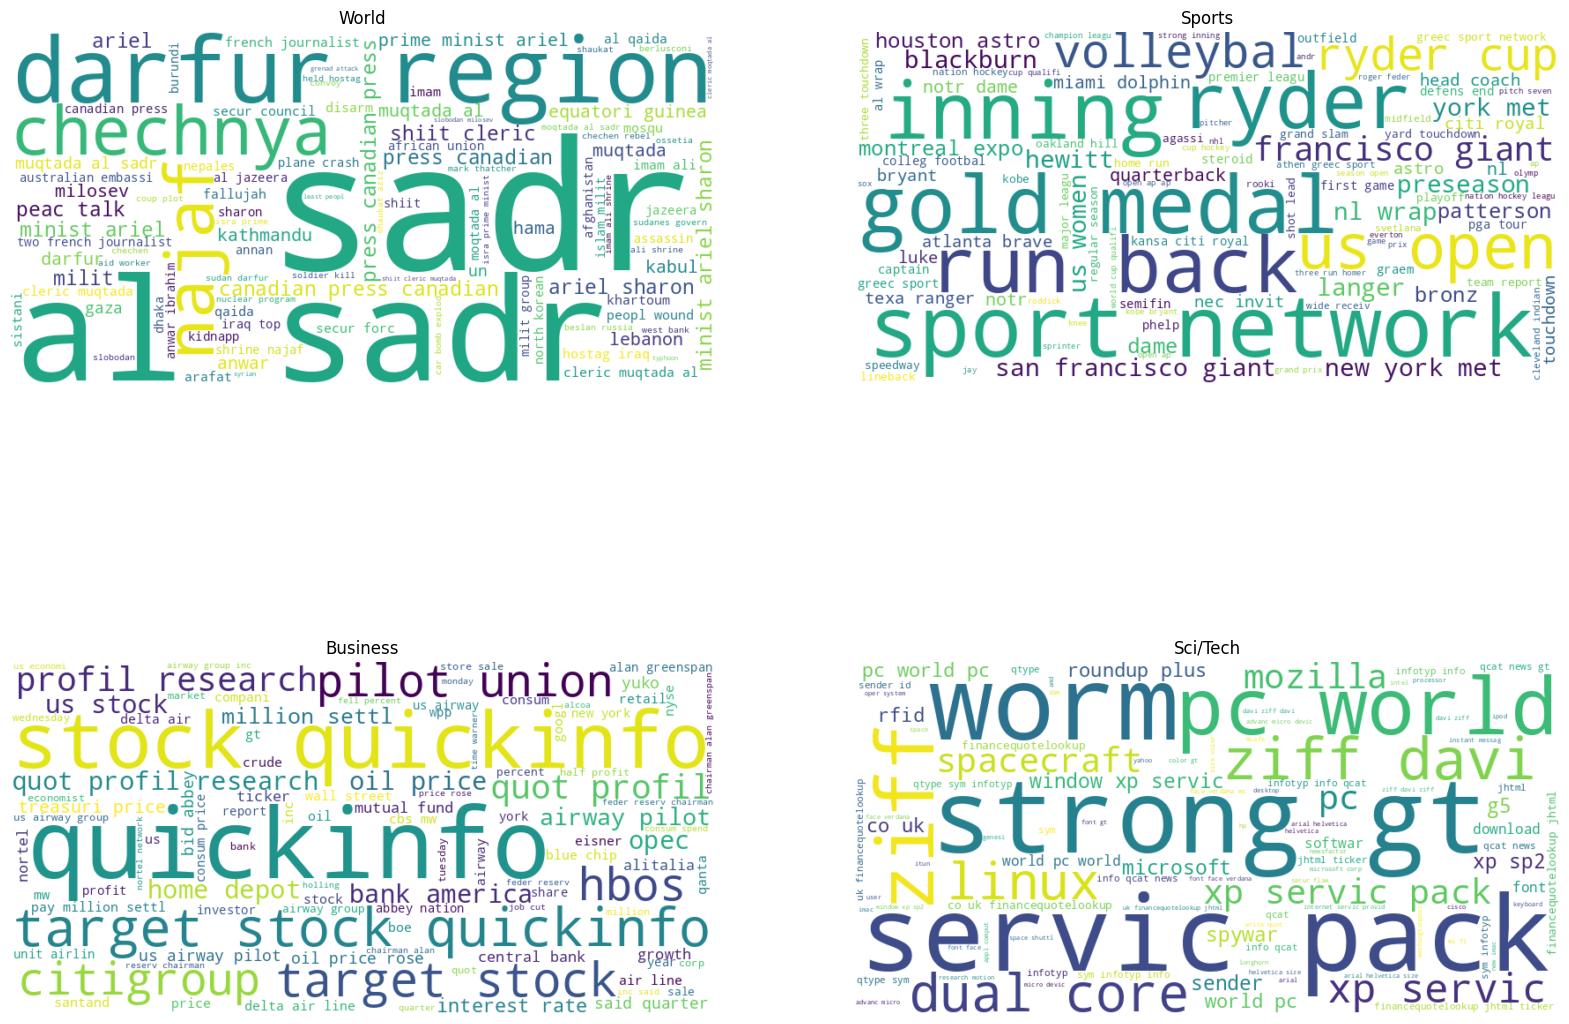

In [ ]:
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'cv', 'num_labels', 'tfidf_matrix', 'labels', and 'stop_words' are already defined

# Compile a regex pattern to match "fullquot", "com", or "apx" as whole words
pattern = re.compile(r'\b(fullquot|com|aspx|www|reuter|http|lt|href)\b')

plt.figure(figsize=(20, 15))

for label in range(num_labels):
    # Convert the TF-IDF row for the label into a word-frequency dictionary
    row = np.squeeze(tfidf_matrix[label].toarray())
    feature_names = cv.get_feature_names_out()
    word_freqs = {feature_names[i]: row[i] for i in range(len(feature_names)) if row[i] > 0}

    # Use the compiled regex pattern to filter out words matching the pattern
    word_freqs_filtered = {word: count for word, count in word_freqs.items() if not pattern.search(word)}

    # Generate the word cloud
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100, width=800, height=400).generate_from_frequencies(word_freqs_filtered)

    plt.subplot(2, 2, label+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(labels[label])
    plt.axis('off')

plt.show()



## Top 10

Just to get a slightly different perspective using the exact same methodology as above, lets visualize these differently by looking at the top 10 highest TFIDF scores in each.

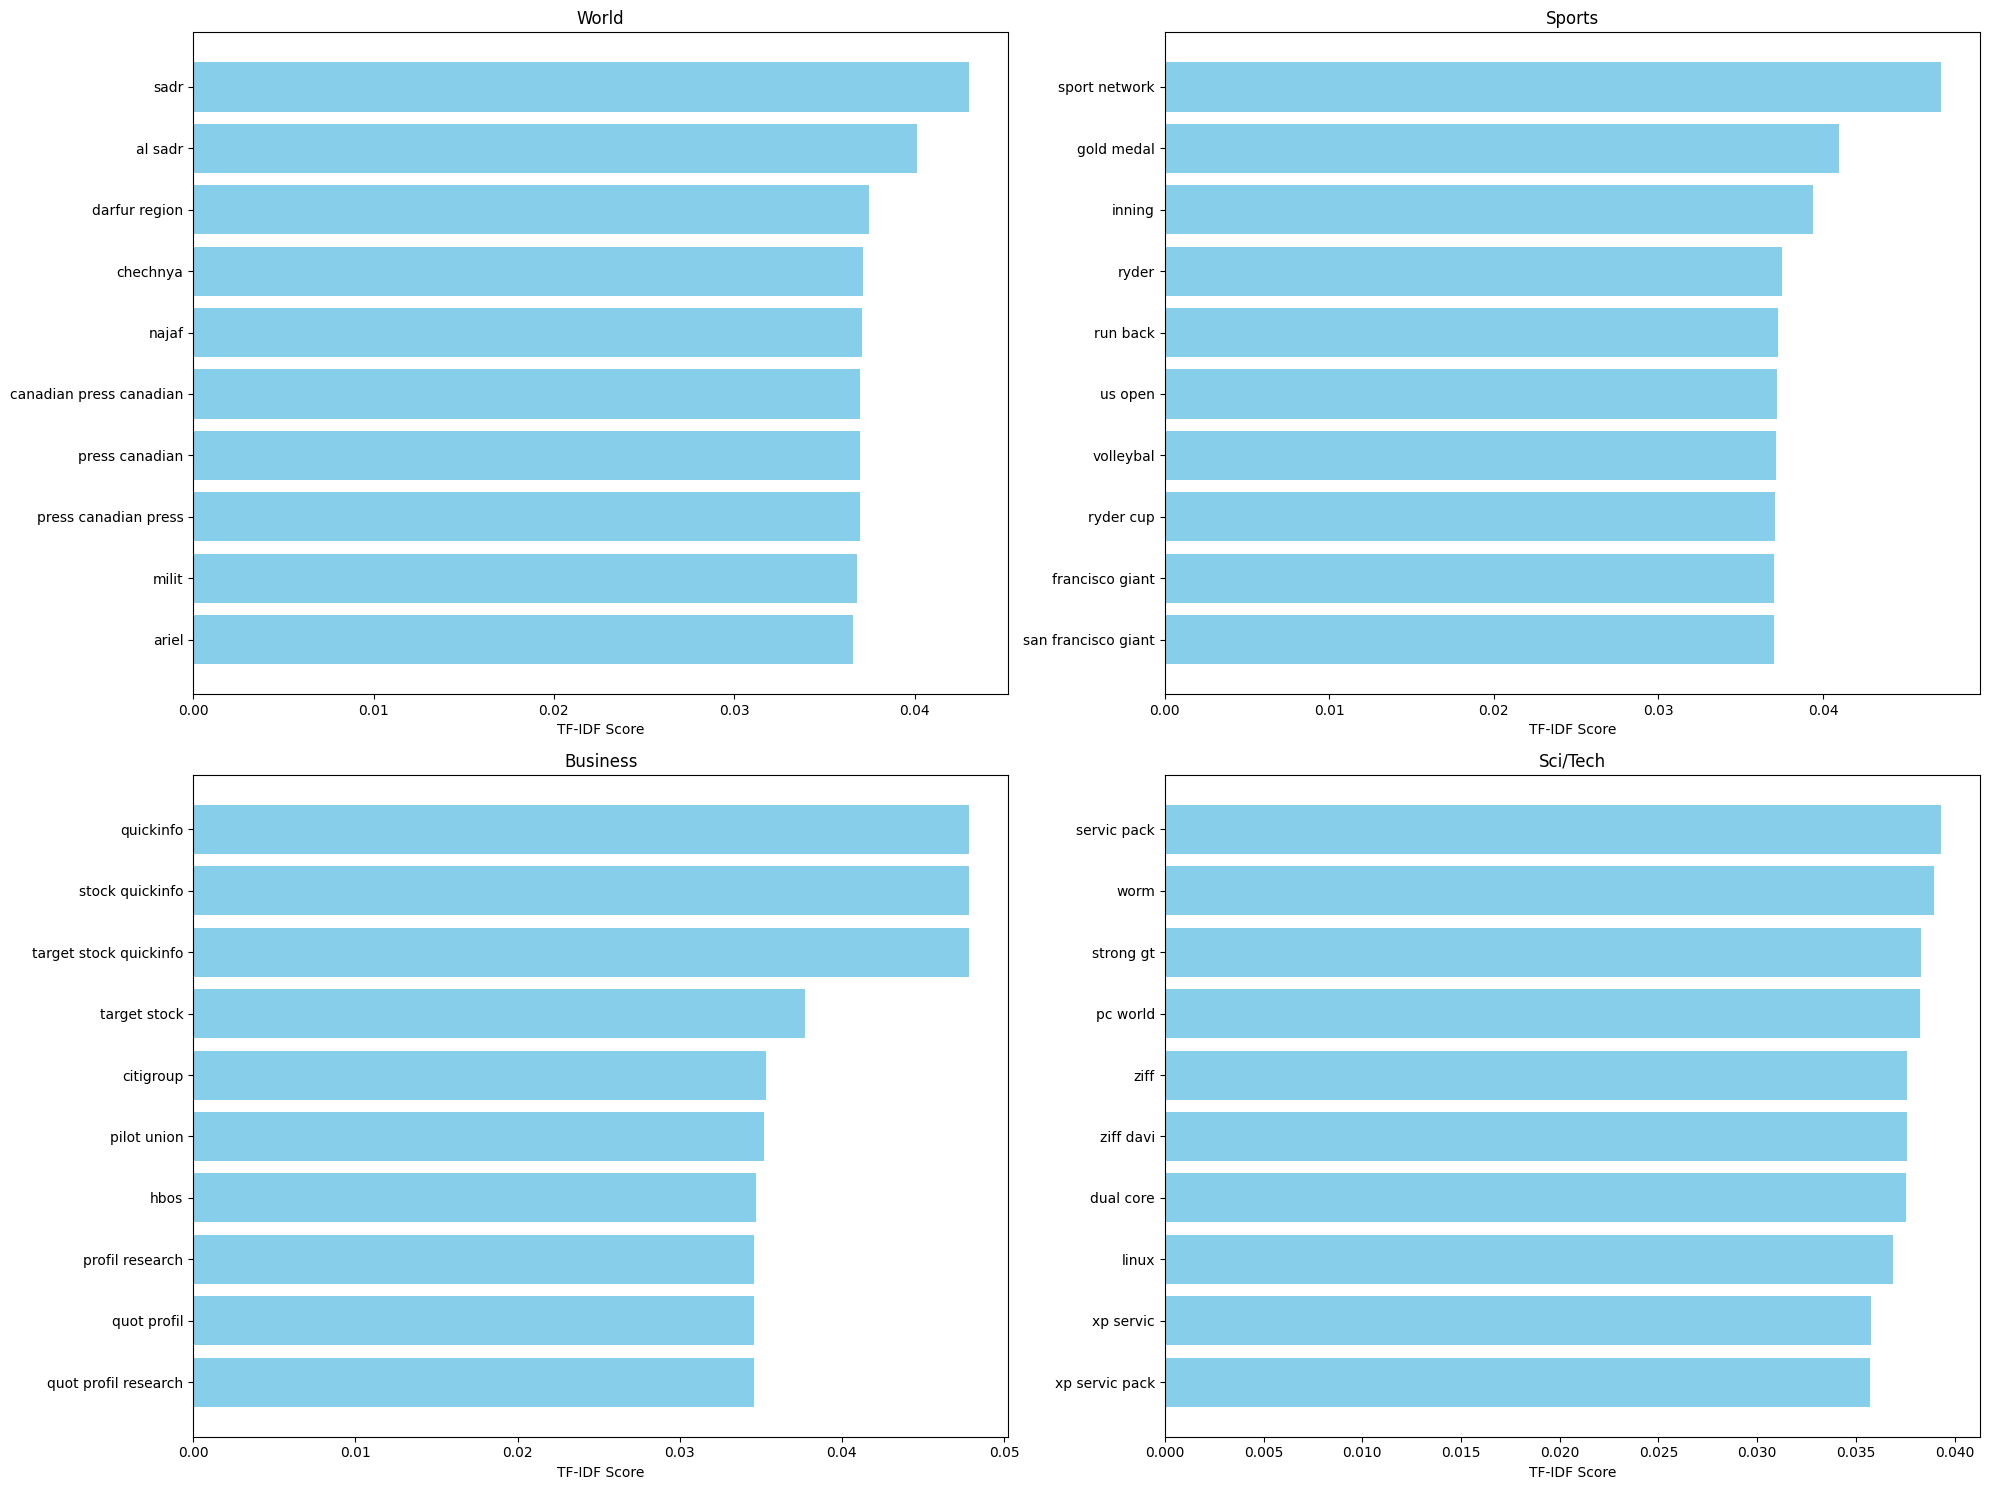

In [ ]:
import re
import matplotlib.pyplot as plt
import numpy as np

# Compile a regex pattern to match unwanted terms as whole words
pattern = re.compile(r'\b(fullquot|com|aspx|www|reuter|http|lt|href)\b')

plt.figure(figsize=(20, 15))

for label in range(num_labels):
    # Convert the TF-IDF row for the label into a word-frequency dictionary
    row = np.squeeze(tfidf_matrix[label].toarray())
    feature_names = cv.get_feature_names_out()
    word_freqs = {feature_names[i]: row[i] for i in range(len(feature_names)) if row[i] > 0}

    # Use the compiled regex pattern to filter out words matching the pattern
    word_freqs_filtered = {word: count for word, count in word_freqs.items() if not pattern.search(word)}

    # Sort the words by frequency and pick the top 10
    top_words = sorted(word_freqs_filtered.items(), key=lambda item: item[1], reverse=True)[:10]

    # Separate the words and their corresponding frequencies for plotting
    words, freqs = zip(*top_words)

    # Create a subplot for each label
    plt.subplot(2, 2, label + 1)
    plt.barh(words, freqs, color='skyblue')
    plt.xlabel('TF-IDF Score')
    plt.title(labels[label])
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest values on top

plt.tight_layout()
plt.show()

<a name="hw"></a>
# Homework

Choose a dataset, and generate a set of dictionaries from the data as was done in section 5 above. Please:

* find a labeled dataset
* explore data (use `.info` on your dataframe, for example)
* preprocess the text
* create tfidf matrix
* pick some interesting parameters and justify your choices with a few sentences.
* visualize these dictionaries with word clouds.

In [ ]:
import pandas as pd
splits = {'train': 'train.parquet', 'validation': 'validation.parquet', 'test': 'test.parquet'}
rottentomatoes_df = pd.read_parquet("hf://datasets/cornell-movie-review-data/rotten_tomatoes/" + splits["train"])
rottentomatoes_df

text  label
0     the rock is destined to be the 21st century's ...      1
1     the gorgeously elaborate continuation of " the...      1
2                        effective but too-tepid biopic      1
3     if you sometimes like to go to the movies to h...      1
4     emerges as something rare , an issue movie tha...      1
...                                                 ...    ...
8525  any enjoyment will be hinge from a personal th...      0
8526  if legendary shlockmeister ed wood had ever ma...      0
8527  hardly a nuanced portrait of a young woman's b...      0
8528    interminably bleak , to say nothing of boring .      0
8529  things really get weird , though not particula...      0

[8530 rows x 2 columns]

In [ ]:
labels = {0: 'Negative', 1: 'Positive'}

In [ ]:
#a